<div style="text-align:center; background-color:#003366; align-items:center; border-radius: 10px;">
    <h1 style="color:white; padding: 33px; font-size: 40px; font-family: 'Roboto', sans-serif;">Spotify & Youtube Analysis Report | EDA </h1>
</div>

<div style="text-align:center; background-color: #f0f0f0; padding: 20px; border-radius: 10px">
    <table style="margin: auto; background-color: #ffffff; border-collapse: collapse;">
        <tr>
            <td>
                <img src="https://storage.googleapis.com/pr-newsroom-wp/1/2023/05/Spotify_Primary_Logo_RGB_Green.png" alt="Spotify Logo" style="height: 430px; margin-left: 70px;" width="430" height="430">
            </td>
            <td>
                <img src="https://www.svgrepo.com/show/416500/youtube-circle-logo.svg" alt="YouTube Logo" style="height: 420px; margin-right: 25px;" width="600" height="700">
            </td>
        </tr>
    </table>
</div>


## About the Dataset

Dataset of songs of various artist in the world and for each song is present:

 - Several statistics of the music version on spotify, including the number of streams;

 - Number of views of the official music video of the song on youtube.

## Importing Libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Spotify-Youtube.csv")

## Data Exploration

In [5]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [6]:
df.shape

(20718, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [8]:
duplicate_rows = df[df.duplicated()]
print('Number of duplicated rows:', duplicate_rows.shape[0])

# There is no duplicated values in the dataset

Number of duplicated rows: 0


In [9]:
df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

### Missing Values

- **"Url_youtube", "Title", "Description", "Licensed", "official_video"**: I think they are not needed for my analysis
- **"Stream", "Views", "Likes", "Comments"**: They are important variables, so I will think how to fix them
- **"Channel"**: I will fill in the blanks as "unknown"

### Drop the columns I don't need

In [10]:
df.drop(['Unnamed: 0','Url_spotify', 'Uri','Url_youtube','Title','Description','official_video','Licensed'], axis=1, inplace=True)

# I removed the columns I did not need in my analysis.

### Fix "Channel" Missings

In [11]:
df.fillna({'Channel':'Unknown'}, inplace=True)

In [12]:
df['Channel'].isna().sum()

# Check if data is cleaned

0

### Fill  Numerical Columns with Mean Values

In [13]:
mean_values = df[['Stream', 'Views', 'Likes', 'Comments']].mean()
mean_values

Stream      1.359422e+08
Views       9.393782e+07
Likes       6.633411e+05
Comments    2.751899e+04
dtype: float64

In [14]:
df[['Stream', 'Views', 'Likes', 'Comments']] = df[['Stream', 'Views', 'Likes', 'Comments']].fillna(mean_values)

# Filling the missing values ​​for related columns with mean

### Check if data is cleaned

In [15]:
df.isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        2
Energy              2
Key                 2
Loudness            2
Speechiness         2
Acousticness        2
Instrumentalness    2
Liveness            2
Valence             2
Tempo               2
Duration_ms         2
Channel             0
Views               0
Likes               0
Comments            0
Stream              0
dtype: int64

In [54]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.715111e+08,1.765807e+06,1.905626e+05,2.407143e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.950563e+06,2.302175e+04,5.420000e+02,1.825666e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.572401e+07,1.354555e+05,3.571500e+03,5.275420e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.798379e+07,5.897498e+05,1.647000e+04,1.359422e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


## Number of unique values ​​in the data set

In [17]:
object_df = df.select_dtypes(include='object')
object_df.nunique()

# Select only columns with object data type

Artist         2079
Track         17841
Album         11937
Album_type        3
Channel        6715
dtype: int64

# Data Visualization

### Engagemant Metrics

In [18]:
engagemant_metrics_corr = df[['Views','Likes','Comments']].corr()
engagemant_metrics_corr

,Views,Likes,Comments
Views,1.000000,0.890949,0.431051
Likes,0.890949,1.000000,0.631202
Comments,0.431051,0.631202,1.000000


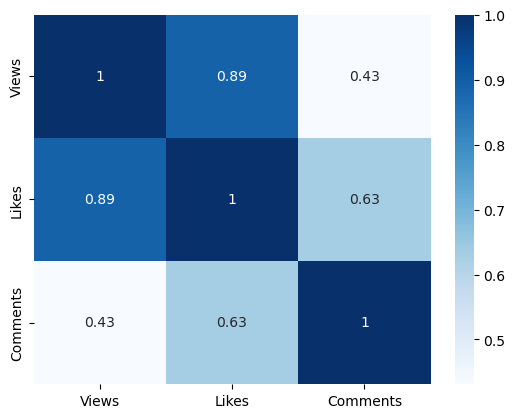

In [19]:
sns.heatmap(engagemant_metrics_corr, annot=True, cmap='Blues')
plt.show()

#### In this heatmap, I examined the correlation between engagement metrics: Views, Likes and Comments. 
- According to this heatmap, as the number of views increases, the number of likes and comments also increases.
- Likewise, as the number of likes increases, comments also increases as expected.

### Audio Metrics

In [20]:
audio_metrics_corr = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
                         'Valence', 'Tempo']].corr()
audio_metrics_corr

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Danceability,1.000000,0.236596,0.353408,0.210376,-0.279435,-0.318611,-0.084482,0.465756,-0.065943
Energy,0.236596,1.000000,0.744845,0.065319,-0.658304,-0.310058,0.173717,0.389158,0.157383
Loudness,0.353408,0.744845,1.000000,0.033699,-0.547680,-0.545406,0.087062,0.311578,0.144766
Speechiness,0.210376,0.065319,0.033699,1.000000,-0.077598,-0.109895,0.085463,0.059204,0.037553
Acousticness,-0.279435,-0.658304,-0.547680,-0.077598,1.000000,0.274379,-0.040922,-0.200816,-0.129367
Instrumentalness,-0.318611,-0.310058,-0.545406,-0.109895,0.274379,1.000000,-0.060021,-0.269785,-0.076734
Liveness,-0.084482,0.173717,0.087062,0.085463,-0.040922,-0.060021,1.000000,0.031904,0.006670
Valence,0.465756,0.389158,0.311578,0.059204,-0.200816,-0.269785,0.031904,1.000000,0.090432
Tempo,-0.065943,0.157383,0.144766,0.037553,-0.129367,-0.076734,0.006670,0.090432,1.000000


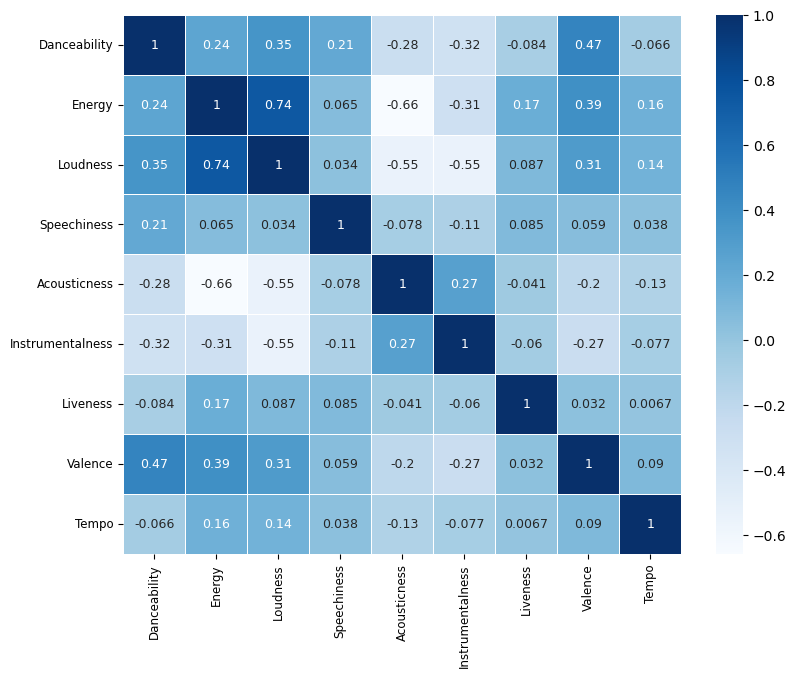

In [21]:
plt.figure(figsize=(9, 7))
ax = sns.heatmap(audio_metrics_corr, annot=True, cmap= 'Blues', annot_kws={"size": 9}, linewidth = 0.5)

# Adjusting the label sizes of the X and Y axes
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8.5)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8.5)

plt.show()

#### In this heatmap, I examined the correlation between audio metrics.
##### Strong positive correlation:
- There is a strong positive correlation between **Energy** and **Loudness** meaning that songs with higher energy tend to be louder or vice versa.
- There is also a strong positive correlation between **Danceability** and **Valence** which means that songs that are suitable for dancing express more positive emotions.
##### Strong negative correlation:
- There is a strong negative correlation between **Acousticness** and **Energy** meaning that acoustic songs tend to be less energetic.
- There is also a strong negative correlation between **Acousticness** and **Loudness** meaning that acoustic songs tend to be less loud.r.

### Distribution of Songs by Album Type

In [22]:
album_type_count = df['Album_type'].value_counts()
album_type_count

Album_type
album          14926
single          5004
compilation      788
Name: count, dtype: int64

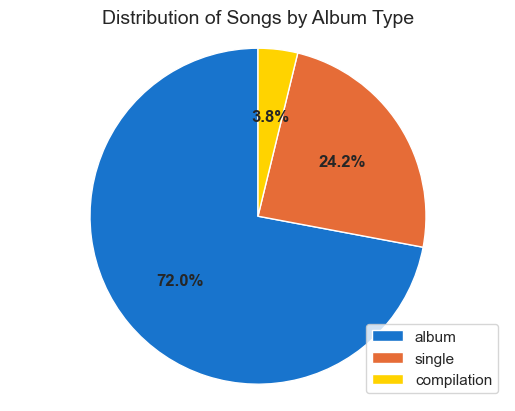

In [62]:
colors = ['#1874CD', '#E66C37', '#FFD300']

plt.pie(album_type_count, startangle=90, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
labels = album_type_count.index

plt.title('Distribution of Songs by Album Type', size=14)
plt.legend(labels, loc='lower right')
plt.axis('equal')
plt.show()

- We can see from the pie chart above that most of the songs were released as albums.

### Top 10 Songs on Youtube Views

#### Shortening the name of the songs

In [24]:
df['Track'] = df['Track'].replace({"See You Again (feat. Charlie Puth)":"See You Again",
                                   "Swalla (feat. Nicki Minaj & Ty Dolla $ign)":"Swalla",
                                   "Taki Taki (with Selena Gomez, Ozuna & Cardi B)":"Taki Taki",
                                   "Uptown Funk (feat. Bruno Mars)":"Uptown Funk",
                                   "Can't Hold Us (feat. Ray Dalton)":"Can't Hold Us",
                                   "Sunflower - Spider-Man: Into the Spider-Verse":"Sunflower - Spider-Man",
                                   "Eastside (with Halsey & Khalid)":"Eastside",
                                   "Enemy (with JID) - from the series Arcane League of Legends":"Enemy (with JID)"})

In [25]:
top_10_songs_yt = df.groupby('Track')[['Views']].sum().sort_values(['Views'], ascending=False).head(10)
top_10_songs_yt

# Top 10 Songs by Youtube Views

,Views
Track,
Despacito,1.615930e+10
See You Again,1.154760e+10
Lean On,9.974505e+09
Shape of You,5.908398e+09
Calma - Remix,5.322011e+09
This Is What You Came For,5.252060e+09
Swalla,5.162404e+09
Wheels on the Bus,4.898831e+09
Taki Taki,4.828403e+09


### Top 10 Songs on Spotify Stream

In [26]:
top_10_songs_sp = df.groupby('Track')[['Stream']].sum().sort_values(['Stream'], ascending=False).head(10)
top_10_songs_sp

# Top 10 Artists by Spotify Stream

,Stream
Track,
Closer,5.465365e+09
Can't Hold Us,5.225629e+09
Sunflower - Spider-Man,5.076660e+09
Happier,4.757615e+09
STAY (with Justin Bieber),4.731555e+09
Señorita,4.672440e+09
The Middle,4.566883e+09
Eastside,4.274888e+09
lovely (with Khalid),4.221148e+09


### Visualization of Top 10 Songs

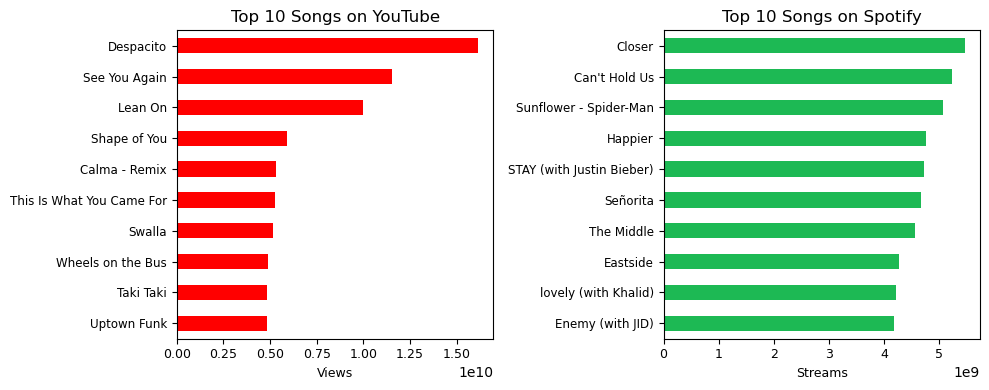

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Top 10 Artists on YouTube (Views)
ax1.set_title('Top 10 Songs on YouTube', fontsize=12)
top_10_songs_yt.plot(kind='barh', ax=ax1, color='#FF0000', legend=False)
ax1.set_xlabel('Views', fontsize=9)
ax1.set_ylabel('')
ax1.tick_params(axis='x', labelsize=9) 
ax1.tick_params(axis='y', labelsize=8.5) 
ax1.invert_yaxis()

# Top 10 Artists on Spotify (Stream)
ax2.set_title('Top 10 Songs on Spotify', fontsize=12)
top_10_songs_sp.plot(kind='barh', ax=ax2, color='#1DB954', legend=False)
ax2.set_xlabel('Streams', fontsize=9)
ax2.set_ylabel('')
ax2.tick_params(axis='x', labelsize=9) 
ax2.tick_params(axis='y', labelsize=8.5)
ax2.invert_yaxis()

fig.tight_layout()
plt.show()


- From the bar charts above, we can say that top 10 songs on YouTube and Spotify are different from each other. 
- The most streamed song on YouTube is **Despacito**, while on Spotify it is **Closer**.

### Top 10 Songs on Youtube - Audio Metrics

In [38]:
top_songs_audio_yt = df.groupby('Track').agg({'Views': 'sum', 'Energy': 'mean', 'Danceability': 'mean', 
                                              'Acousticness': 'mean'}).sort_values(['Views'], ascending=False).reset_index().head(10)
top_songs_audio_yt

,Track,Views,Energy,Danceability,Acousticness
0,Despacito,1.615930e+10,0.797,0.655,0.19800
1,See You Again,1.154760e+10,0.481,0.689,0.36900
2,Lean On,9.974505e+09,0.809,0.723,0.00346
3,Shape of You,5.908398e+09,0.652,0.825,0.58100
4,Calma - Remix,5.322011e+09,0.764,0.826,0.33700
5,This Is What You Came For,5.252060e+09,0.927,0.631,0.19900
6,Swalla,5.162404e+09,0.817,0.696,0.07500
7,Wheels on the Bus,4.898831e+09,0.387,0.941,0.18400
8,Taki Taki,4.828403e+09,0.801,0.842,0.15700
9,Uptown Funk,4.821016e+09,0.609,0.856,0.00801


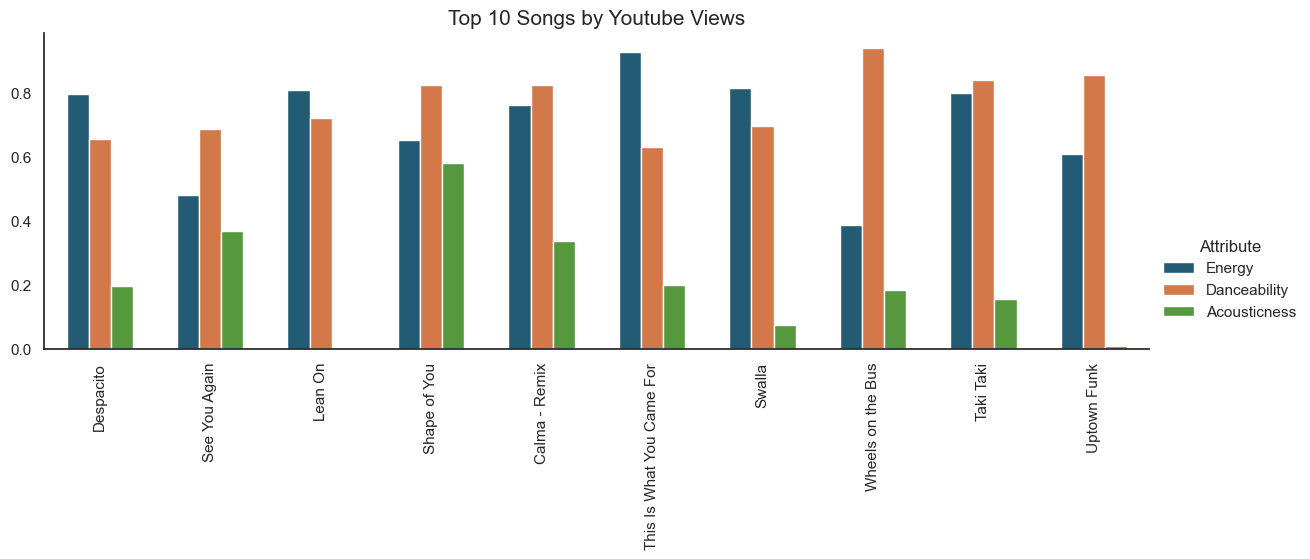

In [51]:
figsize = (8,5)
top_songs_yt_melt = top_songs_audio_yt.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                var_name='Attribute', value_name='Value')

sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_yt_melt, kind='bar',
            palette={'Energy': '#156082', 'Danceability': '#E97132', 'Acousticness': '#4EA72E'},
            aspect=3, height=4, width=0.6)

plt.title('Top 10 Songs by Youtube Views', fontsize=15)
plt.xticks(rotation=90, size=11)
plt.yticks(size=11)
plt.xlabel('')
plt.ylabel('')
plt.show()


- We can see the audio metrics of top 10 songs on YouTube above. Generally **energy** and **danceability** values ​​are high, while the **acousticness** value is lower.
- This shows that the number of views of the songs is directly proportional to their energy and danceability values.

### Top 10 Songs on Spotify - Audio Metrics

In [42]:
top_songs_audio_sp = df.groupby('Track').agg({'Stream': 'sum', 'Energy': 'mean', 'Danceability': 'mean', 
                                              'Acousticness': 'mean'}).sort_values(['Stream'], ascending=False).reset_index().head(10)
top_songs_audio_sp

,Track,Stream,Energy,Danceability,Acousticness
0,Closer,5.465365e+09,0.656600,0.6304,0.265048
1,Can't Hold Us,5.225629e+09,0.927000,0.6330,0.026700
2,Sunflower - Spider-Man,5.076660e+09,0.522000,0.7550,0.533000
3,Happier,4.757615e+09,0.656333,0.6320,0.306000
4,STAY (with Justin Bieber),4.731555e+09,0.764000,0.5910,0.038300
5,Señorita,4.672440e+09,0.548000,0.7590,0.039200
6,The Middle,4.566883e+09,0.705000,0.7255,0.137525
7,Eastside,4.274888e+09,0.686000,0.6320,0.549000
8,lovely (with Khalid),4.221148e+09,0.296000,0.3510,0.934000
9,Enemy (with JID),4.182328e+09,0.783000,0.7280,0.237000


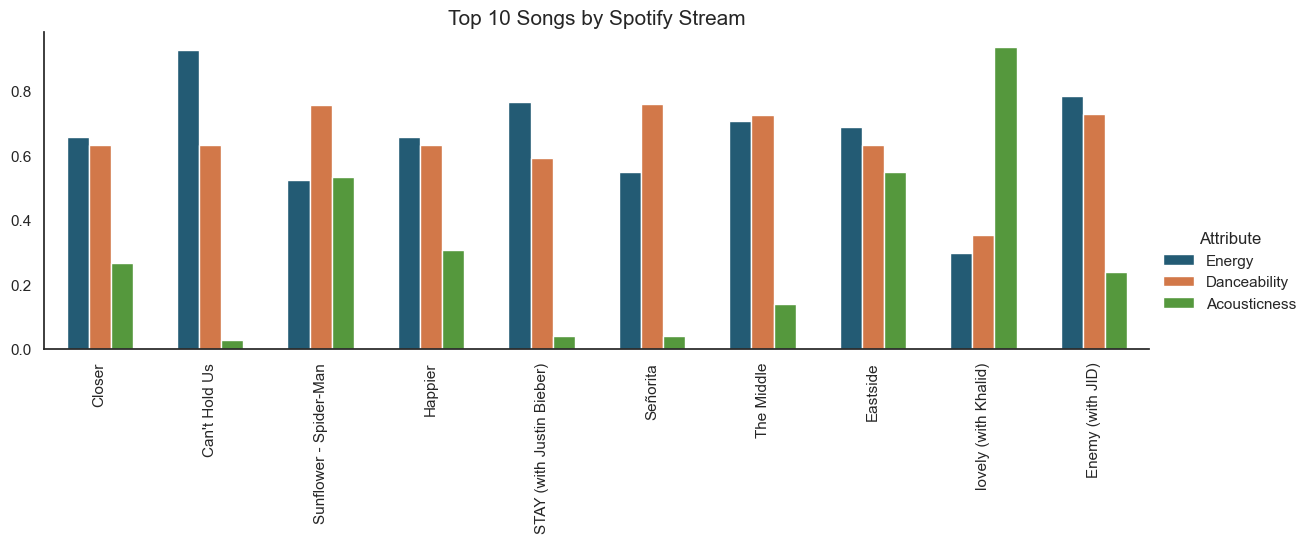

In [50]:
figsize = (8,5)
top_songs_sp_melt = top_songs_audio_sp.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                var_name='Attribute', value_name='Value')

sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_sp_melt, kind='bar',
            palette={'Energy': '#156082', 'Danceability': '#E97132', 'Acousticness': '#4EA72E'},
            aspect=3, height=4, width=0.6)

plt.title('Top 10 Songs by Spotify Stream', fontsize=15)
plt.xticks(rotation=90, size=11)
plt.yticks(size=11)
plt.xlabel('')
plt.ylabel('')
plt.show()


- We can see the audio metrics of top 10 songs on Spotify above. Generally the **Energy** and **Danceability** values ​​are high, while the **Acousticness** value is lower.
- As an exception, we see that the acousticness value in the song **Lovely (with Khalid)** is much higher than the energy and danceability values.

### Top 10 Artists on Youtube

In [52]:
top_10_artists_yt = df.groupby('Artist')[['Views']].sum().sort_values(['Views'], ascending=False).head(10)
top_10_artists_yt

# Top 10 Artists by Youtube Views

,Views
Artist,
Ed Sheeran,1.546021e+10
CoComelon,1.460167e+10
Katy Perry,1.312063e+10
Charlie Puth,1.216759e+10
Luis Fonsi,1.162811e+10
Justin Bieber,1.099106e+10
Daddy Yankee,1.087193e+10
Bruno Mars,1.024092e+10
Macklemore & Ryan Lewis,1.012206e+10


### Top 10 Artists on Spotify

In [53]:
top_10_artists_sp = df.groupby('Artist')[['Stream']].sum().sort_values(['Stream'], ascending=False).head(10)
top_10_artists_sp

# Top 10 Artists by Spotify Stream

,Stream
Artist,
Post Malone,1.525126e+10
Ed Sheeran,1.439488e+10
Dua Lipa,1.340808e+10
XXXTENTACION,1.322435e+10
The Weeknd,1.303197e+10
Justin Bieber,1.209777e+10
Imagine Dragons,1.185831e+10
Coldplay,1.177848e+10
Khalid,1.138684e+10


### Visualization of Top 10 Artists

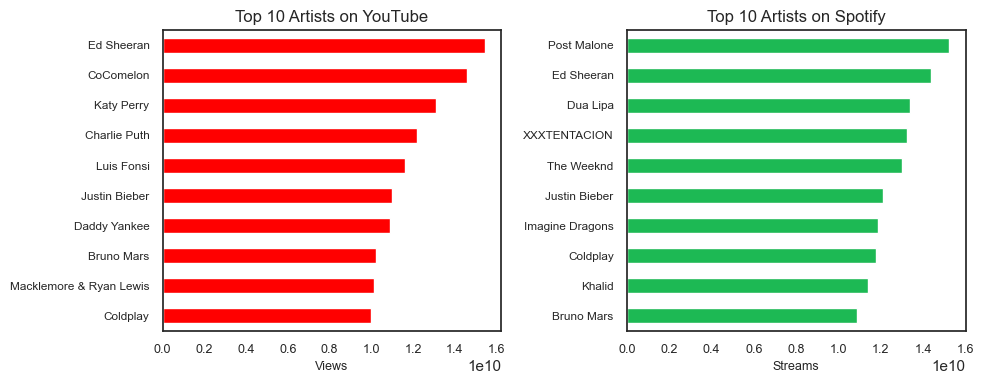

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Top 10 Artists on YouTube (Views)
ax1.set_title('Top 10 Artists on YouTube', fontsize=12)
top_10_artists_yt.plot(kind='barh', ax=ax1, color='#FF0000', legend=False)
ax1.set_xlabel('Views', fontsize=9)
ax1.set_ylabel('')
ax1.tick_params(axis='x', labelsize=9) 
ax1.tick_params(axis='y', labelsize=8.5) 
ax1.invert_yaxis()

# Top 10 Artists on Spotify (Stream)
ax2.set_title('Top 10 Artists on Spotify', fontsize=12)
top_10_artists_sp.plot(kind='barh', ax=ax2, color='#1DB954', legend=False)
ax2.set_xlabel('Streams', fontsize=9)
ax2.set_ylabel('')
ax2.tick_params(axis='x', labelsize=9) 
ax2.tick_params(axis='y', labelsize=8.5)
ax2.invert_yaxis()

fig.tight_layout()
plt.show()


#### We can see that one of the most listened artist on both platforms is Ed Sheeran. So lets analyze Ed Sheeran's most popular songs.

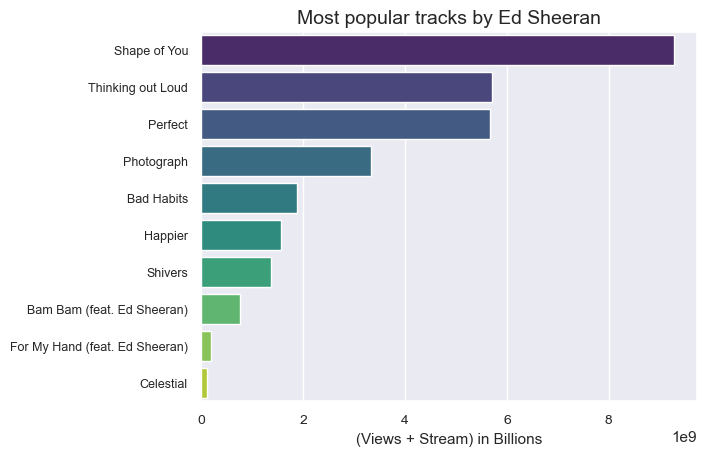

In [84]:
ed_sheeran = df[df['Artist'] == 'Ed Sheeran'].groupby(['Artist','Track']).sum().reset_index()
ed_sheeran['TotalListened'] = ed_sheeran.Views  + ed_sheeran.Stream
ed_sheeran = ed_sheeran.sort_values('TotalListened',ascending=False)

sns.set(style='darkgrid')
fig = sns.barplot(ed_sheeran, x='TotalListened', y='Track', palette = 'viridis')

fig.set_xlabel("(Views + Stream) in Billions", size=11)
fig.set_ylabel("")
fig.set_title("Most popular tracks by Ed Sheeran",fontsize=14)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=9)
plt.show()


Ed Sheeran's top three songs: "Shape of You," "Thinking Out Loud," and "Perfect" can be attributed to several factors:

- **High Quality and Production Value:** Ed Sheeran produces high-quality music videos and songs, which capture viewers' attention and encourage sharing.

- **Catchy Melodies:** These songs feature memorable melodies and emotional lyrics that resonate with listeners, encouraging repeated plays.

- **Diverse Target Audience:** Ed Sheeran's music spans various genres, including pop, R&B, and folk, allowing him to appeal to a wide range of age groups.

- **Social Media and Viral Impact:** His songs have been widely shared on social media platforms, especially in dance and cover videos, which has helped them reach larger audiences.

- **Emotional Themes:** Songs like "Thinking Out Loud" and "Perfect" explore universal themes of love and relationships, making it easy for listeners to connect emotionally.

- **Live Performances:** Ed Sheeran's live performances attract significant attention. His songs are frequently played at concerts and festivals, boosting their popularity.

### Top 10 Artist on Youtube - Audio Metrics

In [90]:
audio_metrics = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence','Tempo']

top_artists_yt = df.groupby('Artist').mean(numeric_only=True)[['Views', 'Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 
                                                            'Liveness', 'Valence', 'Tempo']].sort_values(['Views'], ascending=False).head(10)
top_artists_yt

,Views,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Artist,,,,,,,,,
Ed Sheeran,1.546021e+09,0.7136,0.6089,0.05744,0.308300,0.000065,0.17281,0.56600,105.6930
CoComelon,1.460167e+09,0.7317,0.4002,0.04291,0.529600,0.000017,0.11709,0.82380,158.8619
Katy Perry,1.312063e+09,0.6818,0.7655,0.05210,0.041185,0.000004,0.25363,0.60140,122.6056
Charlie Puth,1.216759e+09,0.7434,0.5650,0.08533,0.381210,0.008600,0.11010,0.61090,109.9254
Luis Fonsi,1.162811e+09,0.6446,0.7417,0.07795,0.314690,0.000042,0.18304,0.64480,128.1499
Justin Bieber,1.099106e+09,0.6468,0.6003,0.10524,0.373010,0.000145,0.22745,0.56130,123.5776
Daddy Yankee,1.087193e+09,0.7724,0.8212,0.06922,0.133920,0.000020,0.13871,0.68220,103.7047
Bruno Mars,1.024092e+09,0.6933,0.6256,0.04544,0.197940,0.000007,0.16883,0.59974,116.9292
Macklemore & Ryan Lewis,1.012206e+09,0.6538,0.6699,0.15899,0.223420,0.000015,0.21397,0.50833,102.1451


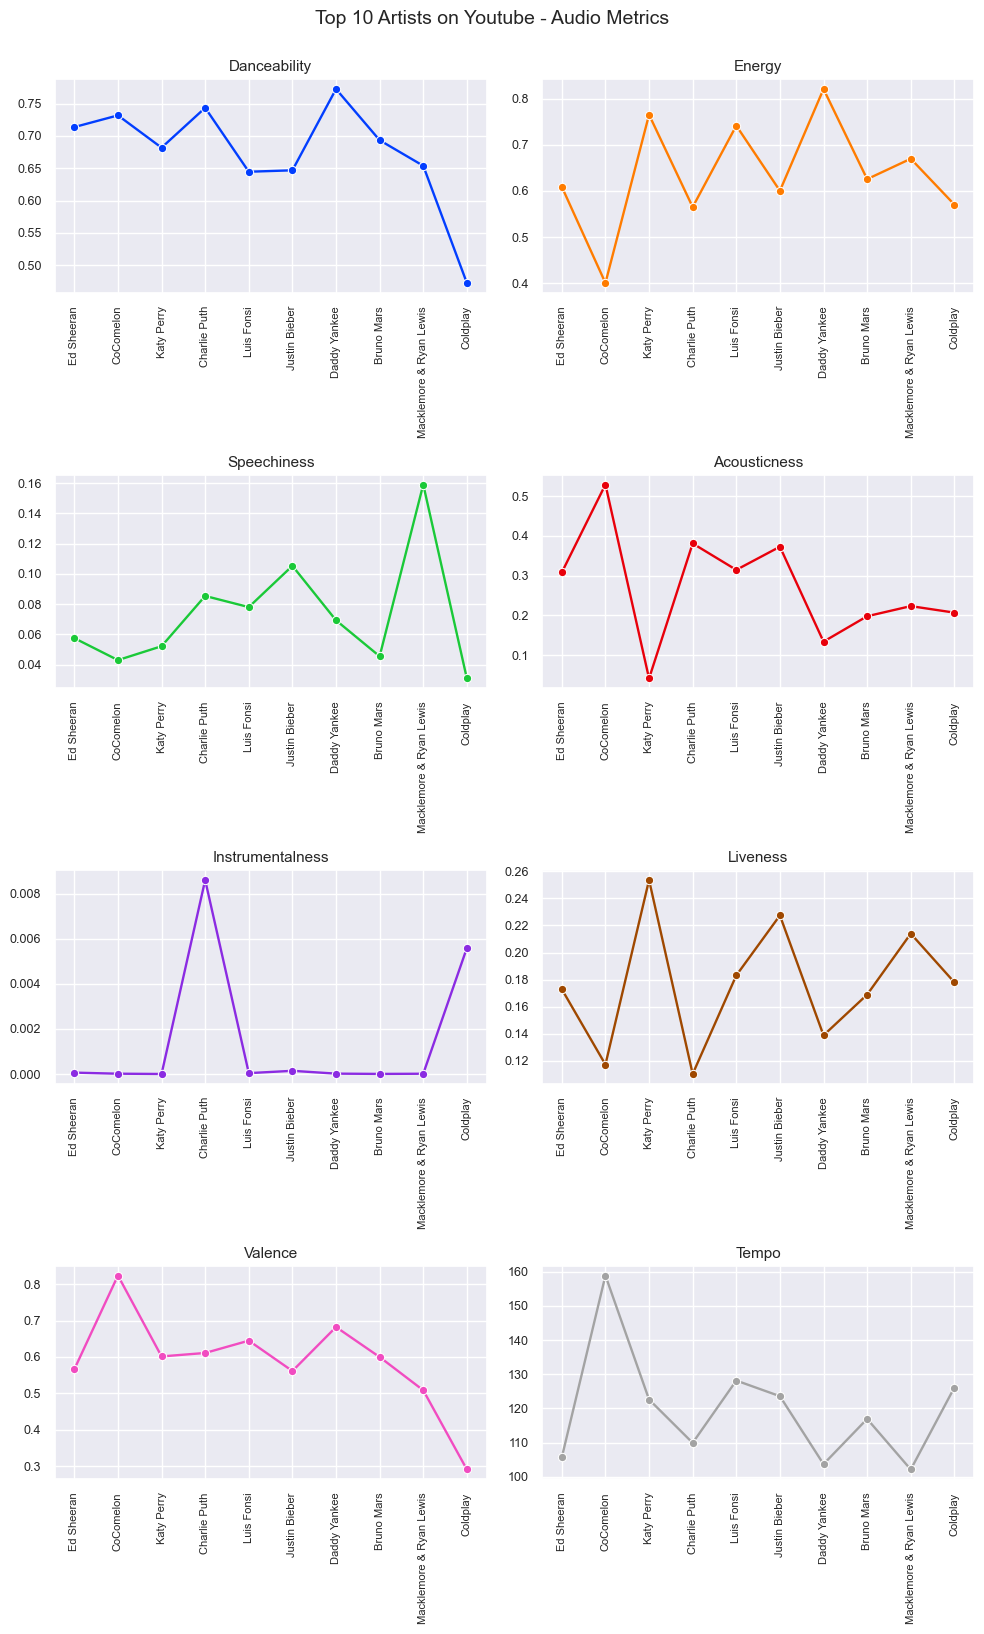

In [91]:
# Calculate the number of rows and columns for the subplots
n_audio_metrics = len(audio_metrics)
n_cols = 2
n_rows = (n_audio_metrics + n_cols - 1) // n_cols

# Create a figure for subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

# Define a color palette
colors = sns.color_palette("bright", n_audio_metrics_yt)

# Loop through the metrics and create a line plot for each
for i, metric in enumerate(audio_metrics):
    ax = axs[i // n_cols, i % n_cols]
    sns.lineplot(data=top_artists_yt, x='Artist', y=metric, ax=ax, marker='o', linewidth=1.7, color=colors[i])
    
    ax.set_title(metric, fontsize=11)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', labelsize=8, rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.suptitle('Top 10 Artists on Youtube - Audio Metrics', fontsize=14, y=1.02)
plt.show()


When analyzing the audio metrics of the top 10 songs on YouTube, the following factors might explain why Speechiness and Instrumentality values are low, while Danceability, Energy, and Valence levels are high:

- **Music Genre:** The top songs often belong to genres like pop, dance, or electronic music, which typically feature strong rhythms and melodies. These genres prioritize danceability and energy, resulting in higher values for those metrics.

- **Focus on Melody and Rhythm:** Songs that are popular on platforms like YouTube often emphasize catchy melodies and engaging rhythms over lyrical content. This can lead to lower Speechiness values since the focus is less on spoken words and more on musical elements.

- **Production Style:** Many hit songs are produced to create an uplifting and energetic experience. This results in higher Energy and Valence scores, as producers aim for music that makes listeners feel good and want to dance.

- **Social and Dance Trends:** The popularity of dance challenges and trends on social media platforms often influences song choices. Tracks that are danceable and energetic are more likely to be shared and promoted, further boosting their visibility and popularity.

### Top 10 Youtube Channels with the most Views

In [97]:
data_channel= df[df['Channel'] != 'Unknown'].groupby('Channel')['Views'].sum().sort_values(ascending=False).head(10)
data_channel

Channel
T-Series                      4.796159e+10
LuisFonsiVEVO                 2.170252e+10
CalvinHarrisVEVO              1.828114e+10
Macklemore                    1.700341e+10
Ed Sheeran                    1.691822e+10
Hear This Music               1.508851e+10
Cocomelon - Nursery Rhymes    1.460167e+10
Bruno Mars                    1.301357e+10
KatyPerryVEVO                 1.247680e+10
DJSnakeVEVO                   1.245510e+10
Name: Views, dtype: float64

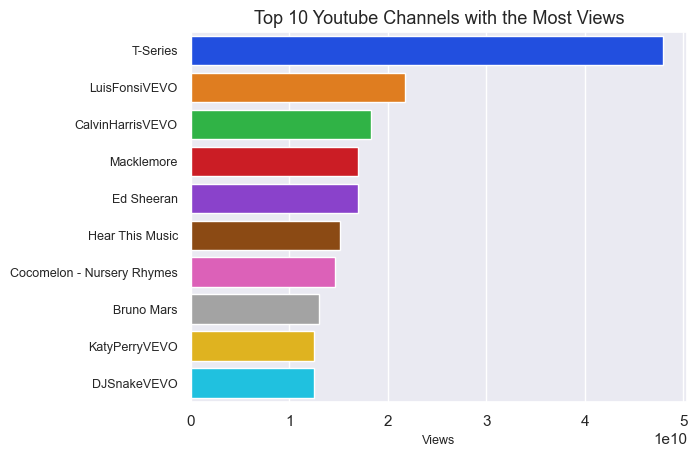

In [99]:
sns.barplot(x=data_channel.values, y=data_channel.index, palette='bright')

plt.title('Top 10 Youtube Channels with the Most Views', fontsize=13)
plt.yticks(size=9)
plt.xlabel('Views', fontsize=9)
plt.ylabel('', fontsize=9)
plt.show()

In [112]:
t_series = df[df['Channel']=='T-Series'].groupby('Track')[['Views','Likes','Comments']].sum().sort_values(by='Views',ascending=False).reset_index().head(10)
t_series

,Track,Views,Likes,Comments
0,Taaron Ke Shehar,1.805247e+09,16183975.0,499624.0
1,Khairiyat,1.757311e+09,13470858.0,494442.0
2,Vaaste,1.484846e+09,12472906.0,349875.0
3,"Chogada (From ""Loveyatri"")",1.349974e+09,6404759.0,150636.0
4,"O Saki Saki (From ""Batla House"")",1.335488e+09,6503614.0,123858.0
5,Lut Gaye,1.285535e+09,10481546.0,340080.0
6,"Dilbar (From ""Satyameva Jayate"")",1.226957e+09,5169453.0,185316.0
7,"High Rated Gabru (From ""Nawabzaade"")",1.164662e+09,6095625.0,420932.0
8,Dil Galti Kar Baitha Hai,1.090816e+09,11972221.0,313156.0
9,Main Rahoon Ya Na Rahoon,1.031200e+09,7513400.0,216666.0


**T-Series** channel is the most viewed YouTube channel. With a total of approximately 5 billion views, it has more than double the views of the second most viewed channel, Luis Fonsi. So, what is the T-Series channel about?

**T-Series** is an India-based music and film production company. On YouTube, it has gained a large following by releasing **Bollywood music** and popular song videos from India. T-Series is particularly known for its music videos, film trailers, and various music content. Since 2019, it has held the title of **the most subscribed channel** on YouTube and continues to maintain that status.

#### There are several reasons why T-Series is the most viewed YouTube channel:

- **Rich Content Variety:** T-Series offers a diverse range of content, including Bollywood music, movie trailers, music videos, and various musical content. This variety helps attract a wide audience.

- **Target Audience:** As one of India’s largest music and film production companies, T-Series has a large viewer base in India and around the world. It specifically appeals to audiences interested in Indian music.

- **High-Quality Production:** T-Series attracts viewer interest by providing high-quality content in music videos and productions. Professional production and filming capture the audience's attention.

- **Social Media and Viral Content:** T-Series videos are frequently shared on social media, which boosts view counts. Viral content can attract even more attention to the channel.

- **Population of India:** India's large population increases T-Series' potential viewer base. Millions of people are following T-Series' content.

### T-Series Channel Review

#### Top 10 Songs on T-Series Channel

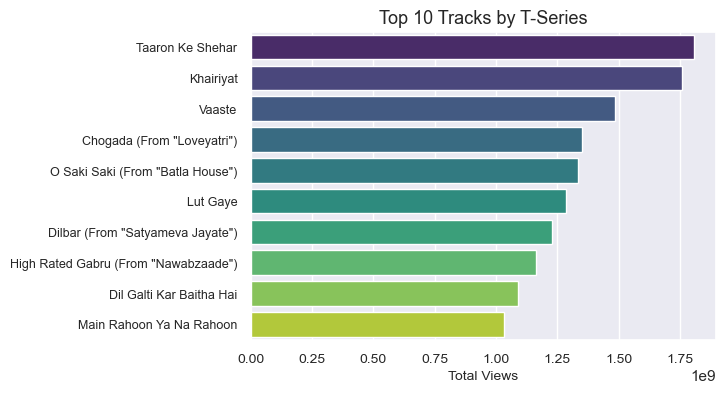

In [145]:
# Barplot oluşturma
plt.figure(figsize=(6, 4))
sns.barplot(data=t_series, x='Views', y='Track', palette='viridis')

# Grafik başlıkları ve etiketleri
plt.title('Top 10 Tracks by T-Series', fontsize=13)
plt.xlabel('Total Views', fontsize=10)
plt.xticks(size=10)
plt.yticks(size=9)
plt.ylabel('')
plt.show()


#### Top 10 Songs Audio Metrics

In [177]:
t_series_metrics = df[df['Channel']=='T-Series'].groupby('Track').agg({'Views': 'sum', 'Energy': 'mean', 'Danceability': 'mean', 
                                              'Acousticness': 'mean', 'Valence':'mean', 'Liveness':'mean'}).sort_values(['Views'], ascending=False).reset_index().head(10)
t_series_metrics

,Track,Views,Energy,Danceability,Acousticness,Valence,Liveness
0,Taaron Ke Shehar,1.805247e+09,0.610,0.441,0.2380,0.348,0.1010
1,Khairiyat,1.757311e+09,0.481,0.534,0.6970,0.293,0.1420
2,Vaaste,1.484846e+09,0.479,0.444,0.4540,0.315,0.0950
3,"Chogada (From ""Loveyatri"")",1.349974e+09,0.972,0.359,0.1360,0.595,0.1400
4,"O Saki Saki (From ""Batla House"")",1.335488e+09,0.961,0.737,0.1630,0.567,0.3610
5,Lut Gaye,1.285535e+09,0.785,0.638,0.1850,0.515,0.2450
6,"Dilbar (From ""Satyameva Jayate"")",1.226957e+09,0.912,0.725,0.1550,0.674,0.1070
7,"High Rated Gabru (From ""Nawabzaade"")",1.164662e+09,0.841,0.685,0.1180,0.590,0.2600
8,Dil Galti Kar Baitha Hai,1.090816e+09,0.780,0.612,0.0781,0.554,0.0593
9,Main Rahoon Ya Na Rahoon,1.031200e+09,0.488,0.550,0.7180,0.301,0.1260


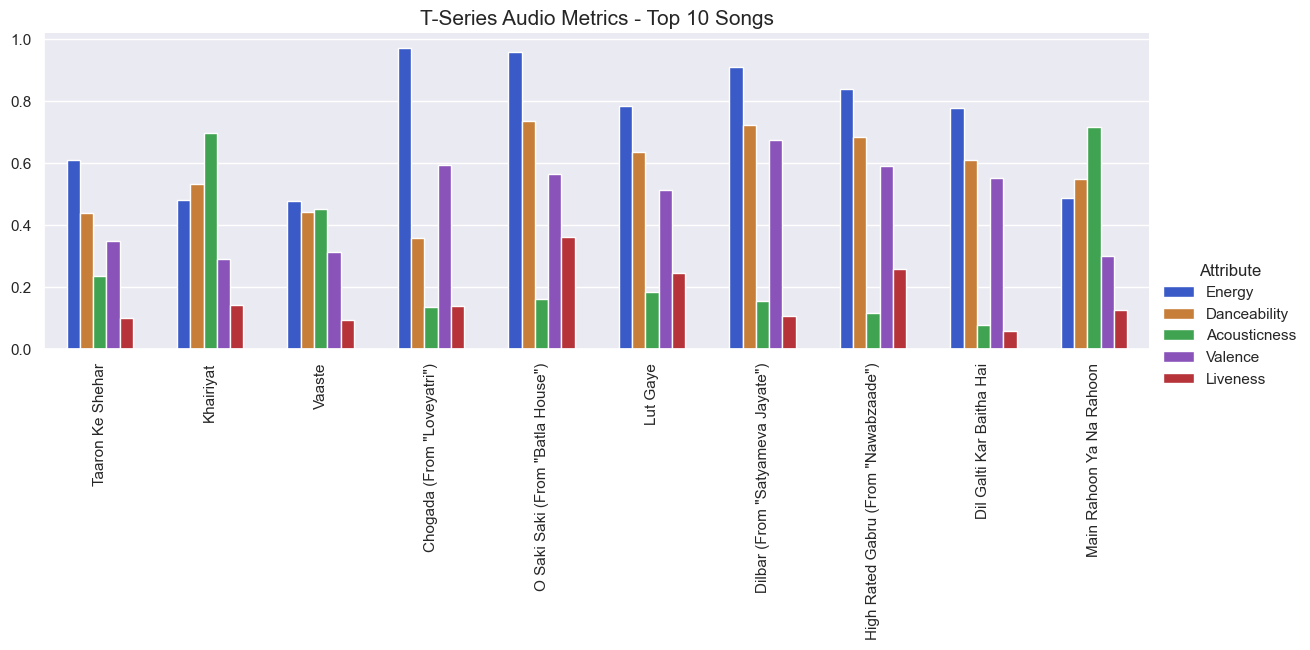

In [186]:
figsize = (8,5)

t_series_melt = t_series_metrics.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness', 'Valence', 'Liveness'],
                                var_name='Attribute', value_name='Value')

sns.catplot(x='Track', y='Value', hue='Attribute', data=t_series_melt, kind='bar', 
            palette={'Energy': '#224FDF', 'Danceability': '#DF7D20', 'Acousticness': '#30B346', 'Valence':'#8A42CB', 'Liveness':'#CB1D25'},
            aspect=3, height=4, width=0.6)

plt.title('T-Series Audio Metrics - Top 10 Songs', fontsize=15)
plt.xticks(rotation=90, size=11)
plt.yticks(size=11)
plt.xlabel('')
plt.ylabel('')
plt.show()


- When we look at the sound metrics of the top 10 songs on the T-Series channel, we can say that the energy, valence and danceability values ​​are generally high, while the acoustics and liveliness values ​​are low. There may be several reasons for this:

1. **Genre**: T-Series primarily features energetic and lively genres such as Bollywood music, pop and dance music. Such music usually has high energy, danceability and positive valence (emotional positivity).

2. **Target Audience**: T-Series appeals to a wide audience. Music played at parties, events and dance venues usually looks for high energy and danceability.

3. **Production Style**: Bollywood music is usually supported by rich production techniques and increases the energy of the music. For example, fast tempos, rhythmic instruments and rich melodic structures are often found in this type of music.

4. **Lack of Acoustic Music**: Most of the content provided by T-Series is in popular music genres, so acoustic and live performances are usually less common. Acoustic music usually offers a lower energy and calmer atmosphere.

5. **Listener Preferences**: Listener preferences can also affect these values. Generally, listeners tend to prefer more energetic and lively songs, which contributes to higher energy and danceability values.